In [126]:
import patchify
import numpy as np
import matplotlib.pyplot as plt

In [127]:
# loc_P04 = '/home/saumya/Documents/Rajesh_sir_Dip/Schlieren-Data/P04/'
loc_P04 = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/P04/'

In [128]:
data = np.load(loc_P04+'P04.npy')

In [129]:
cropped_data = []
for k in data:
    cropped_data.append(k[270:950, 290:720])

In [130]:
cropped_data[0].shape

(680, 430)

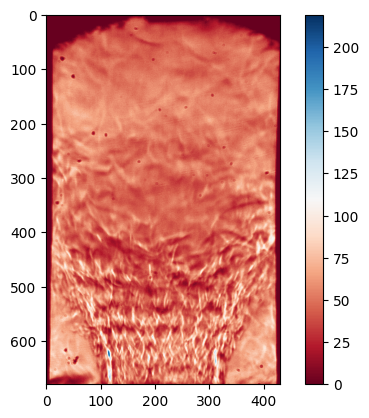

In [131]:
peg = plt.imshow(cropped_data[200], cmap='RdBu')
plt.colorbar(peg)

In [132]:
cropped_data[0].shape

(680, 430)

In [133]:
patches = []
for i in range(data.shape[0]):
    patches.append(patchify.patchify(cropped_data[i], (9, 9), 9))
patches = np.array(patches)

In [134]:
patches.shape

(806, 75, 47, 9, 9)

In [135]:
%who

FuncAnimation	 HTML	 anime	 ax	 bu	 cmap	 cropped_data	 data	 dx	 
dy	 dz	 fft	 fft_filter_1000	 fft_filter_1000_2d	 fft_plots	 fft_ravel	 fft_sig_mean	 fft_sig_median	 
fftfreq	 fig	 frequencies	 hist	 i	 j	 k	 loc_P04	 mat	 
matplotlib	 max_height	 mean	 mean_adj	 mean_all	 median	 min_height	 n	 neg	 
np	 patches	 patchify	 peg	 plt	 rgba	 sampling_rate	 x	 xAmplitudes	 
x_data	 xedges	 xpos	 y	 yAmplitudes	 y_data	 yedges	 ypos	 zpos	 



In [136]:
mean = np.zeros(patches.shape[:3])
# median = np.zeros(patches.shape[:3])
# mode = np.zeros(patches.shape[:3])
for k in range(data.shape[0]):
#     # exec(f'mean_{k} = []')
    for i in range(patches.shape[1]):
        for j in range(patches.shape[2]):
            mean[k][i][j] = np.mean(patches[k][i][j])
            # median[k][i][j] = np.median(patches[k][i][j])
            # mode[k][i][j] = np.mode(patches[k][i][j])

In [137]:
mean.shape

(806, 75, 47)

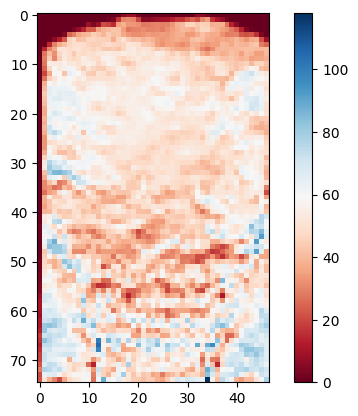

In [138]:
neg = plt.imshow(np.array(mean[100]), cmap='RdBu')
plt.colorbar(neg)

In [139]:
mean_all = np.mean(mean)
print(mean_all)
mean_adj = mean - mean_all

48.102029824907895


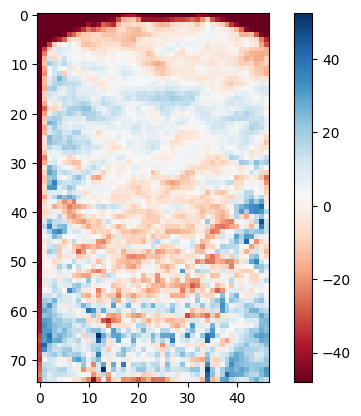

In [140]:
neg = plt.imshow(np.array(mean_adj[10]), cmap='RdBu')
plt.colorbar(neg)

In [141]:
from scipy.fft import fft, fftfreq
fft_sig_mean = np.zeros_like(mean).astype(np.complex64)
fft_sig_median = np.zeros_like(median).astype(np.complex64)
# fft_freq = np.zeros_like(mean).astype(np.complex64)
for i in range(mean.shape[1]):
    for j in range(mean.shape[2]):
            fft_sig_mean[:, i, j] = fft(mean_adj[:, i, j])
            # fft_sig_median[:, i, j] = fft(median[:, i, j])
            # fft_freq[:, i, j] = fftfreq(mean[:, i, j])


In [142]:
fft_sig_mean.shape

(806, 75, 47)

In [143]:
n = fft_sig_mean.shape[0]  # Number of data points
sampling_rate = 2.7 * 1000 # Adjust this if your data is sampled differently
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

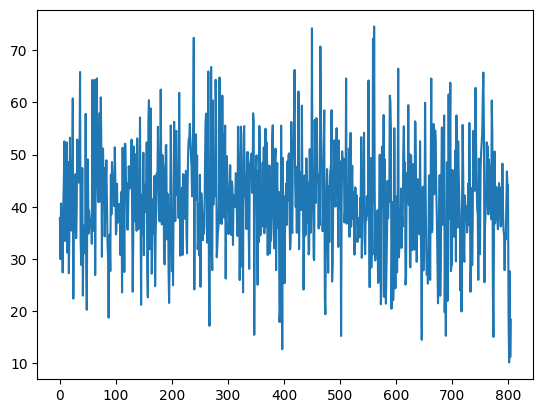

In [144]:
plt.plot(mean[: ,55,20])
# plt.xlim([0,1000])

In [145]:
frequencies.shape

(806,)

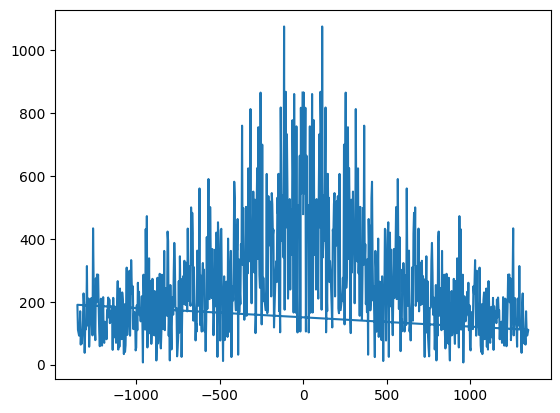

In [146]:
plt.plot(frequencies, np.absolute(fft_sig_mean[: ,44,40]))
# plt.xlim([0,sampling_rate/2])

In [147]:
np.absolute(fft_sig_mean[: ,44,40]).shape

(806,)

In [148]:
# np.absolute(fft_filter_1000[100:int(frequencies.shape[0]/2)]).shape

(0.0, 1350.0)

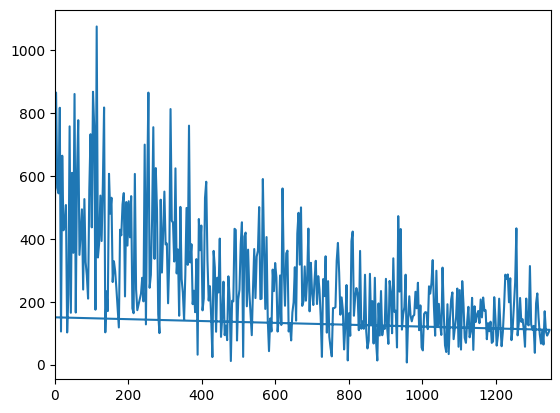

In [149]:
plt.plot(frequencies, np.absolute(fft_sig_mean[: ,44,40]))
plt.xlim([0,sampling_rate/2])

(0.0, 1350.0)

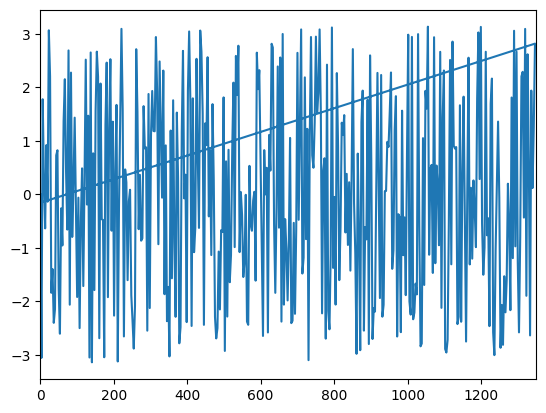

In [150]:
plt.plot(frequencies,np.angle(fft_sig_mean[:,25,33]))
plt.xlim([0,sampling_rate/2])

In [151]:
fft_ravel = np.reshape(fft_sig_mean, [806, fft_sig_mean.shape[1]*fft_sig_mean.shape[2]])

In [152]:
fft_sig_mean.shape

(806, 75, 47)

### scalegram

In [153]:
#https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/A.03-Animation-in-Jupyter-Notebooks.ipynb

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib

matplotlib.rcParams['animation.embed_limit'] = 2**128
 
def anime(x, sig):
    fig, ax = plt.subplots(1, 1)
    # fig.set_size_inches(5,5)
    
    def animate(i):
        ax.clear()
        # Get the point from the points list at index i
        point = abs(sig[:,i])
        # Plot that point using the x and y coordinates
        ax.plot(x, point, 
                label='original',)
        ax.set_title('Pixel = {0:4d} and its FFT plot'.format(i))
        # Set the x and y axis to display a fixed rangeFrame
        ax.set_xlabel("Freq")
        ax.set_ylabel("abs(FFT)")
        ax.set_xlim([0, sampling_rate/2])
        ax.set_ylim([0, 5000])
        # ax.set_ylim([0, 1])
    ani = FuncAnimation(fig, animate, frames=sig.shape[1], interval=500, repeat=True)
    plt.close()
    display(HTML(ani.to_jshtml()))

In [154]:
fft_filter_1000 = np.zeros_like(fft_ravel)

for i in range(fft_ravel.shape[1]):
      for k in range(fft_ravel.shape[0]):
        if (abs(fft_ravel[k][i]<1000)):
            fft_filter_1000[k][i] = 0
        else:
            fft_filter_1000[k][i] = fft_ravel[k][i]

In [155]:
fft_filter_1000.shape

(806, 3525)

In [156]:
# anime(frequencies, fft_filter_1000)

In [157]:
# anime(frequencies, fft_ravel)

In [158]:
frequencies

array([    0.        ,     3.34987593,     6.69975186,    10.04962779,
          13.39950372,    16.74937965,    20.09925558,    23.44913151,
          26.79900744,    30.14888337,    33.49875931,    36.84863524,
          40.19851117,    43.5483871 ,    46.89826303,    50.24813896,
          53.59801489,    56.94789082,    60.29776675,    63.64764268,
          66.99751861,    70.34739454,    73.69727047,    77.0471464 ,
          80.39702233,    83.74689826,    87.09677419,    90.44665012,
          93.79652605,    97.14640199,   100.49627792,   103.84615385,
         107.19602978,   110.54590571,   113.89578164,   117.24565757,
         120.5955335 ,   123.94540943,   127.29528536,   130.64516129,
         133.99503722,   137.34491315,   140.69478908,   144.04466501,
         147.39454094,   150.74441687,   154.0942928 ,   157.44416873,
         160.79404467,   164.1439206 ,   167.49379653,   170.84367246,
         174.19354839,   177.54342432,   180.89330025,   184.24317618,
      

In [159]:
# plt.plot(frequencies[abs(fft_filter_1000[:, 2689]))

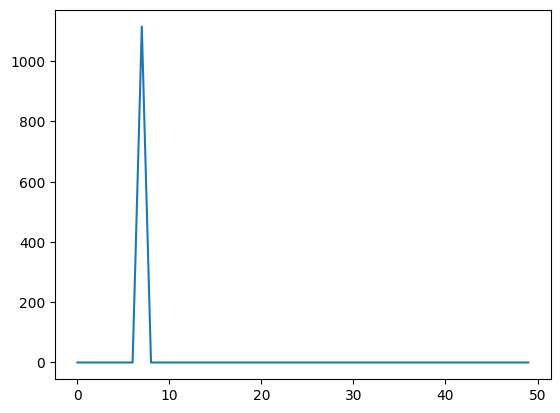

In [160]:
plt.plot(abs(fft_filter_1000[:, 2689])[600:650])

In [161]:
#To save the FFT plots

def fft_plots(loc, name, sig):
    for i in range(sig.shape[1]):
        plt.plot(frequencies, abs(sig[:, i]))
        plt.title('Pixel = {0:4d} and its FFT plot'.format(i))
    # Set the x and y axis to display a fixed rangeFrame
        plt.xlabel("Freq")
        plt.ylabel("abs(FFT)")
        plt.xlim([0, sampling_rate/2])
        plt.ylim([0, 5000])
        exec(f'plt.savefig(loc+name+str({i}))')
        plt.show()

In [162]:
# loc = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/FTT_images/1000_filter/'
# name = 'pixel_FFT_1000_'
# fft_plots(loc,name, fft_filter_1000)

In [163]:
# loc = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/FTT_images/No_filter/'
# name = 'Pixel_FFT_noFilter_'
# fft_plots(loc,name, fft_ravel)

In [164]:
# from matplotlib.animation import FFMpegWriter
# # Save the animation as an animated GIF
# f = 'FFT_demonstration.mp4'
# writer = FFMpegWriter(fps=60, metadata=dict(artist='Me'), bitrate=1800)
# ani.save(f, writer=writer)

In [165]:
fft_filter_1000[0:int(frequencies.shape[0]/2)].shape

(403, 3525)

In [166]:
fft_filter_1000_2d = fft_filter_1000.reshape(fft_sig_mean.shape)

In [168]:
# Preparing data for the 3D plotting 

x_data = frequencies[:int(frequencies.shape[0]/2)]
y_data = np.absolute(fft_filter_1000_2d[:int(frequencies.shape[0]/2)])
# y_data = y_data.reshape(int(frequencies.shape[0]/2), fft_sig_mean.shape[1:])

<BarContainer object of 403 artists>

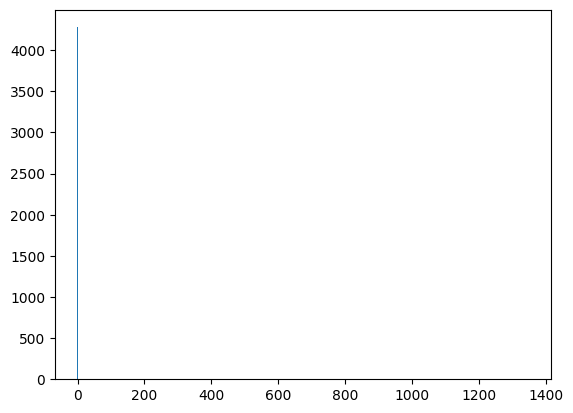

In [170]:
plt.bar(x_data, y_data[:,22,33])

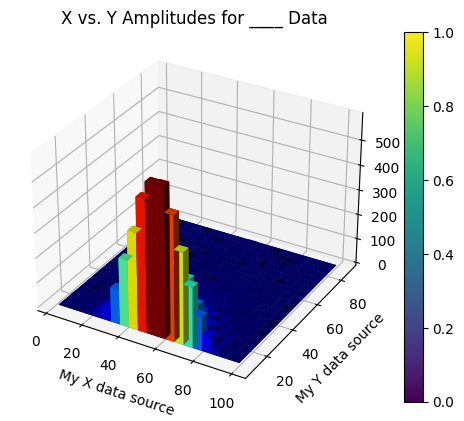

In [171]:
import matplotlib.pyplot as plt
import matplotlib as mat
import numpy as np

xAmplitudes = np.random.exponential(10,10000) #your data here
yAmplitudes = np.random.normal(50,10,10000) #your other data here - must be same array length

x = np.array(xAmplitudes)   #turn x,y data into numpy arrays
y = np.array(yAmplitudes)   #useful for regular matplotlib arrays

fig = plt.figure()          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

#make histogram stuff - set bins - I choose 20x20 because I have a lot of data0:sampling_rate/2], 
hist, xedges, yedges = np.histogram2d(x, y, bins=(20,20))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = mat.colormaps.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

bu = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.colorbar(bu)
plt.title("X vs. Y Amplitudes for ____ Data")
plt.xlabel("My X data source")
plt.ylabel("My Y data source")
plt.savefig("Your_title_goes_here")
plt.show()
